# Exercise 1.3 - Gradient Descent Optimisation (Heathrow 2020)

This script integrates the gradient descent optimisation script with ClimateWins data for Exercise 1.3

## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go

In [2]:
# Create a path for data import

path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 1 - ClimateWins - Main\02 Data'

In [3]:
# Import European weather data

climate = pd.read_csv(os.path.join(path, 'ClimateWins_Dataset_scaled.csv'))
climate.drop(columns={'Unnamed: 0'}, inplace = True)
climate

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1           0.660514          -0.02793        0.826097   
1      19600102      1           0.244897          -0.02793        0.735760   
2      19600103      1           1.076130          -0.02793        1.277781   
3      19600104      1          -1.001953          -0.02793        1.458455   
4      19600105      1           0.244897          -0.02793        1.729466   
...         ...    ...                ...               ...             ...   
22945  20221027     10          -1.833187          -0.02793        0.284075   
22946  20221028     10           0.244897          -0.02793        0.103401   
22947  20221029     10          -0.586336          -0.02793        0.013064   
22948  20221030     10          -0.170720          -0.02793        0.374412   
22949  20221031     10          -0.170720          -0.02793        0.735760   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           -0.001949               -1.101066            -0.265148   
1           -0.001949               -1.058108             1.658760   
2           -0.001949               -1.251420             0.155707   
3           -0.001949               -0.821838            -0.445514   
4           -0.001949               -0.746661            -0.164944   
...               ...                     ...                  ...   
22945        1.037367               -0.005632            -0.004619   
22946        0.976231               -0.005632            -0.004619   
22947        0.716402               -0.005632            -0.004619   
22948        0.487141               -0.005632            -0.004619   
22949        0.196744               -0.005632            -0.004619   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0             -0.179228       -0.902918  ...             -0.443701   
1             -0.179228       -0.810126  ...              0.783085   
2             -0.179228       -1.065304  ...              0.783085   
3             -0.179228       -0.114186  ...              0.783085   
4             -0.179228        0.187388  ...             -1.670486   
...                 ...             ...  ...                   ...   
22945         -0.179228        0.720943  ...             -0.443701   
22946         -0.179228        0.187388  ...             -0.443701   
22947         -0.179228        0.349774  ...             -0.443701   
22948         -0.179228        0.280180  ...             -0.443701   
22949         -0.179228       -0.322968  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...   

## 2. Subsetting

In [4]:
# Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

df

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1        -0.528623           -1.016876   
1      19600102      1        -0.582946           -1.107669   
2      19600103      1        -0.257010           -1.084971   
3      19600104      1        -0.555784           -1.209812   
4      19600105      1        -1.003946           -1.209812   
...         ...    ...              ...                 ...   
22945  20221027     10         0.747959            0.628750   
22946  20221028     10         0.856604            0.367720   
22947  20221029     10         0.856604            0.083991   
22948  20221030     10         0.680055            0.265577   
22949  20221031     10         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

In [5]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

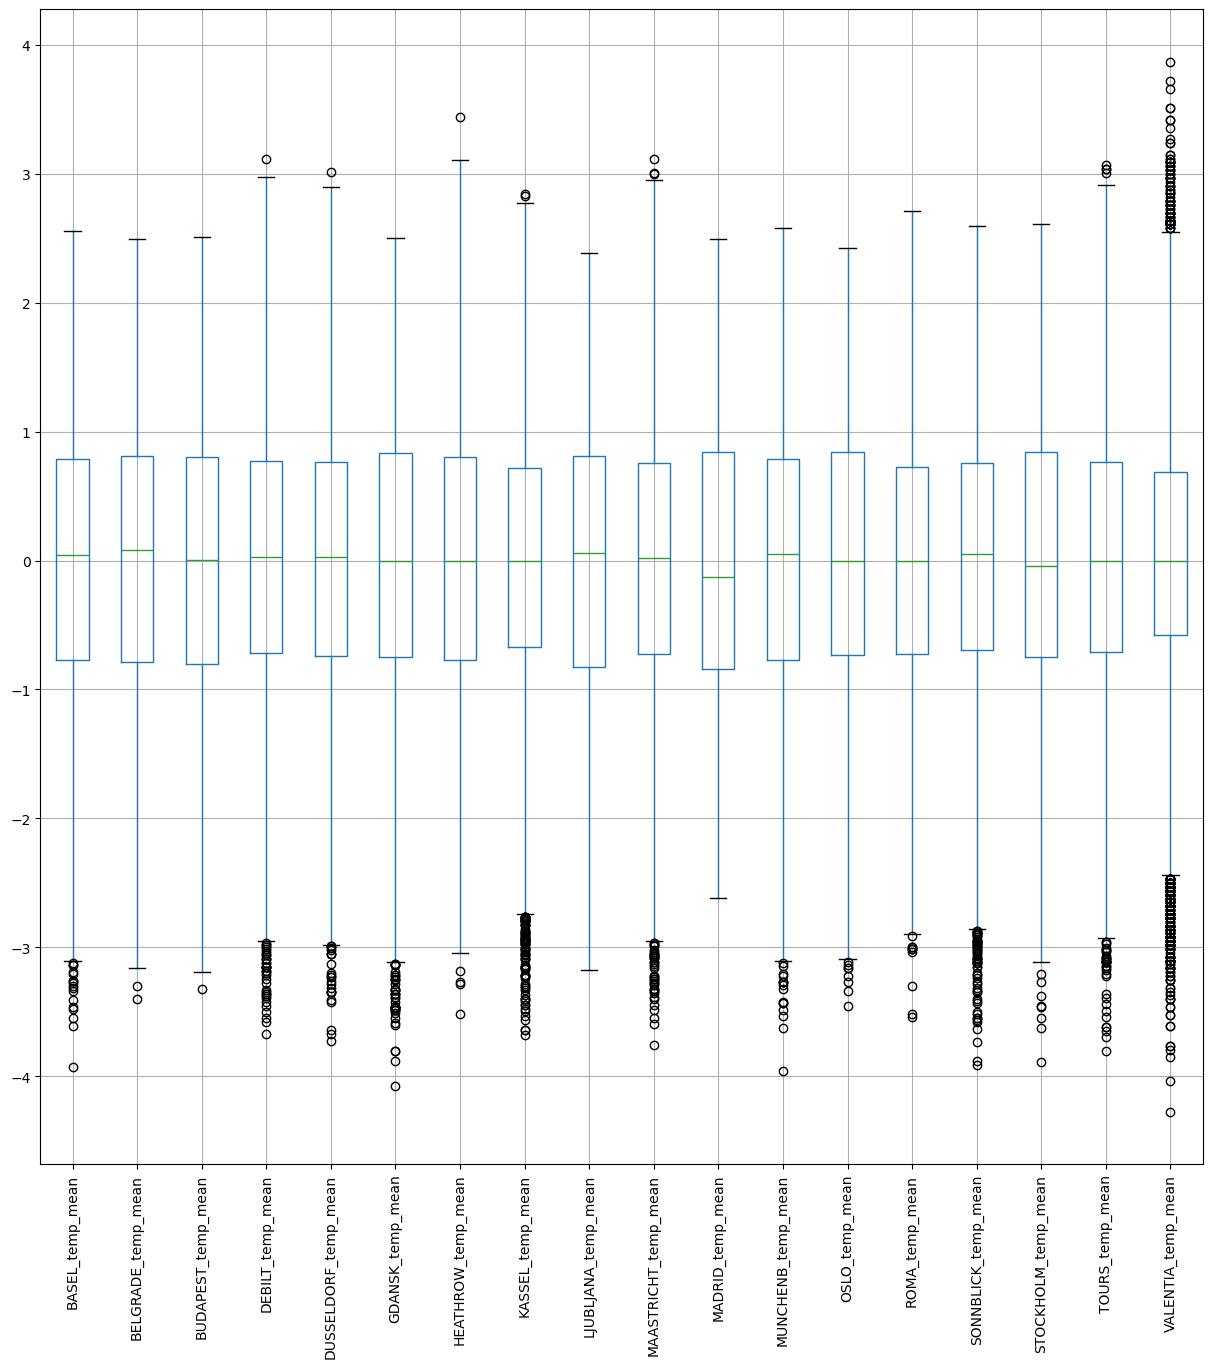

In [6]:
# Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

In [7]:
# Reduce dataset to a single year
dfyear = df[df['DATE'].astype(str).str.startswith('2020')] #<-----INSERT YEAR HERE
dfyear

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
21915  20200101      1        -1.465688           -1.209812   
21916  20200102      1        -1.397785           -1.141717   
21917  20200103      1        -0.691591           -1.357351   
21918  20200104      1        -0.596526           -1.504889   
21919  20200105      1        -1.180494           -1.050924   
...         ...    ...              ...                 ...   
22276  20201227     12        -1.180494           -1.130368   
22277  20201228     12        -0.786655           -0.528863   
22278  20201229     12        -0.813817           -0.131643   
22279  20201230     12        -1.058269           -0.052199   
22280  20201231     12        -1.153333           -0.460768   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
21915           -0.934476         -1.459245             -1.387053   
21916           -1.169744         -0.968756             -1.225060   
21917           -1.569699         -0.383334             -0.444548   
21918           -1.063873         -0.525734             -0.827441   
21919           -1.040346         -0.494089             -0.635995   
...                   ...               ...                   ...   
22276           -1.369721         -0.794712             -0.871621   
22277           -0.863895         -1.016223             -0.945254   
22278           -0.346305         -1.000401             -1.357599   
22279           -0.499230         -0.921290             -1.048340   
22280           -0.734498         -1.253556             -1.151427   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
21915         -0.735776           -1.102331         -0.005705   
21916         -0.953178           -0.595665         -0.005705   
21917         -0.799717           -0.386009         -0.005705   
21918         -0.556739           -0.980032         -0.005705   
21919         -0.722987           -0.648078         -0.005705   
...                 ...                 ...               ...   
22276         -1.017119           -0.875205         -0.005705   
22277         -0.710199           -1.783711         -0.005705   
22278         -0.480009           -1.539113         -0.005705   
22279         -0.838082           -1.521642         -0.005705   
22280         -1.119426           -2.115665         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
21915            -1.370824             -1.612392         -1.123071   
21916            -1.625113             -0.997267         -1.203946   
21917            -1.419260             -0.397145         -1.500486   
21918            -1.104426             -0.772222         -1.069155   
21919            -1.225516             -0.637194         -1.176988   
...                    ...                   ...               ...   
22276            -1.382933             -0.877243         -1.635277   
22277            -1.261843             -1.087286         -1.244383   
22278            -0.947009             -1.207310         -1.406132   
22279            -0.934900             -1.012270         -1.365695   
22280            -1.019663             -1.147298         -1.635277   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
21915           -1.032352       -0.550620       -0.000746   
21916           -1.321402       -0.283654       -0.000746   
21917           -0.693033       -0.235114       -0.000746   
21918           -0.592494       -0.696239       -0.000746   
21919           -0.818707       -0.793317       -0.000746   
...                   ...             ...             ...   
22276           -1.396806       -0.429272       -0.000746   
22277           -1.095189       -0.623429       -0.000746   
22278           -0.781005       -0.502081       -0.000746   
22279           -0.856409       -0.574890       -0.000746   
22280           -0.969515       -0.756913       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
21

In [8]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   2.020067e+07    6.513661         0.236087            0.191498   
std    3.457653e+02    3.455958         0.934854            0.915643   
min    2.020010e+07    1.000000        -1.682979           -1.629730   
25%    2.020040e+07    4.000000        -0.552389           -0.560073   
50%    2.020070e+07    7.000000         0.238684            0.237205   
75%    2.020098e+07    9.750000         0.978830            0.986248   
max    2.020123e+07   12.000000         2.309734            1.945251   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.172345          0.263519              0.226841   
std              0.923699          0.880960              0.905961   
min             -1.581463         -1.490890             -1.607952   
25%             -0.590396         -0.430800             -0.503455   
50%              0.177166          0.233733              0.173970   
75%              0.947669          0.898267              0.851395   
max              1.935795          2.686179              2.500777   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000      3.660000e+02   
mean           0.246097            0.241620     -5.705221e-03   
std            0.815164            0.974223      4.777020e-17   
min           -1.336828           -2.115665     -5.705221e-03   
25%           -0.425658           -0.508308     -5.705221e-03   
50%            0.140227            0.103186     -5.705221e-03   
75%            0.949090            1.029164     -5.705221e-03   
max            2.039297            3.038360     -5.705221e-03   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean              0.170559              0.279836          0.145252   
std               0.916080              0.913584          1.003402   
min              -1.625113             -1.732417         -1.635277   
25%              -0.644284             -0.427152         -0.637824   
50%               0.209401              0.232983         -0.091921   
75%               0.923832              0.949378          0.996516   
max               1.934934              2.783501          2.327576   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000    3.660000e+02   
mean             0.250035        0.275909   -7.461638e-04   
std              0.875189        0.783143    4.451314e-18   
min             -1.434508       -1.290846   -7.461638e-04   
25%             -0.476246       -0.356463   -7.461638e-04   
50%              0.293506        0.110729   -7.461638e-04   
75%              0.953293        0.866124   -7.461638e-04   
max              2.147194        2.203991   -7.461638e-04   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean              0.256961             0.295811         0.319435   
std               0.888164             0.788996         0.922377   
min              -2.113343            -1.075304        -1.543707   
25%              -0.292519            -0.328869        -0.414197   
50%               0.248609             0.112771         0.323121   
75%               0.914051             0.949400         0.966314   
max               2.230310             2.159246         2.660579   

       VALENTIA_temp_mean  
count        3.660000e+02  
mean        -7.287352e-03  
std          4.603310e-17  
min         -7.287352e-03  
25%         -7.287352e-03  
50%         -7.287352e-03  
75%         -7.287352e-03  
max         -7.287352e-03

In [9]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

## 3. Analysis / Setting up Gradient Descent

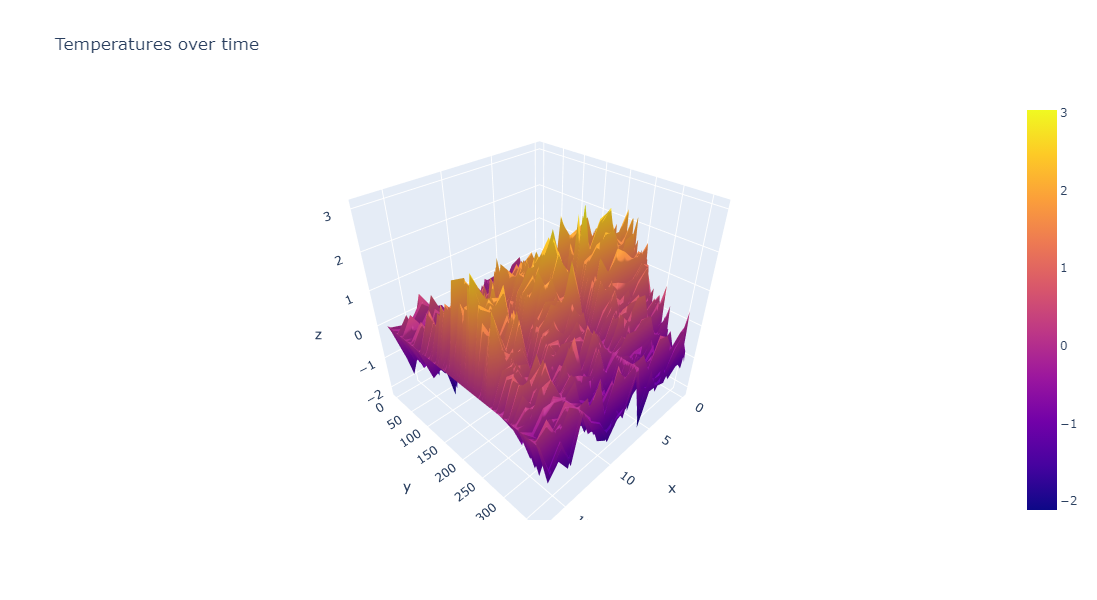

In [10]:
# Plot ALL weather data for all stations for a year 

# X = weather station
# Y = day of the year
# Z = temperature

# you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [11]:
# We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
# We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) # <--- needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [12]:
n_rows = dfyear.shape[0]
n_rows

366

In [13]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.
X = index.to_numpy().reshape(n_rows,1)

# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['HEATHROW_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE (Heathrow chosen)

In [14]:
X.shape, y.shape

((366, 2), (366, 1))

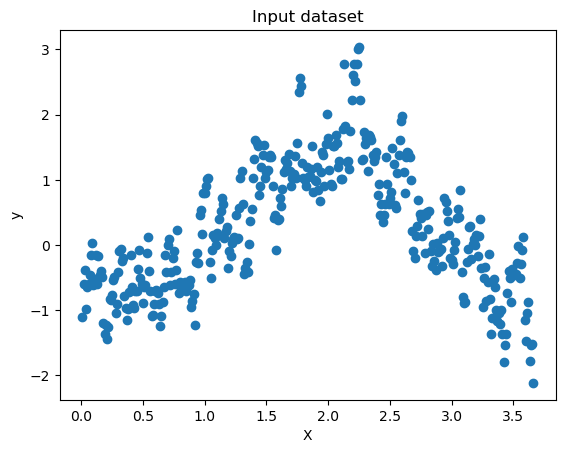

In [15]:
# Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['HEATHROW_temp_mean']) #<----INSERT WEATHER STATION HERE (Heathrow chosen)
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [16]:
# what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['HEATHROW_temp_mean'].min()

-2.115665056099632

In [17]:
# what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['HEATHROW_temp_mean'].max()

3.038359779965828

In [18]:
# This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [19]:
compute_cost(X,y)

array([0.50244867])

In [20]:
# This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [21]:
%%time
# This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
# You will need to adjust these numbers

num_iterations = 200 # <---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init = np.array([[-1],[-1]]) # <---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha = 0.006 # <---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
# If your solution is not converging, try a smaller step size.

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 0 ns
Wall time: 104 ms


In [22]:
theta

array([[-0.33581036],
       [ 0.27248688]])

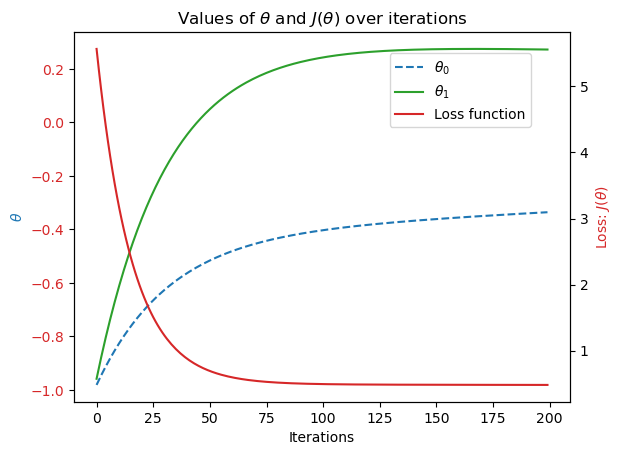

In [23]:
# This will plot your loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
# Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color='tab:green') # Changing colours here to distinguish between thetas

# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
ax2 = ax1.twinx()
color='tab:red'
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Set title
ax1.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')

# Combine legends from both axes
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

plt.show()

In [24]:
%%time
# theta range
theta0_vals = np.linspace(-11,9.6,50) # Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-11,10.2,50) # Put those values as the first two "linspace" numbers in these lines
                                      # Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 141 ms
Wall time: 438 ms


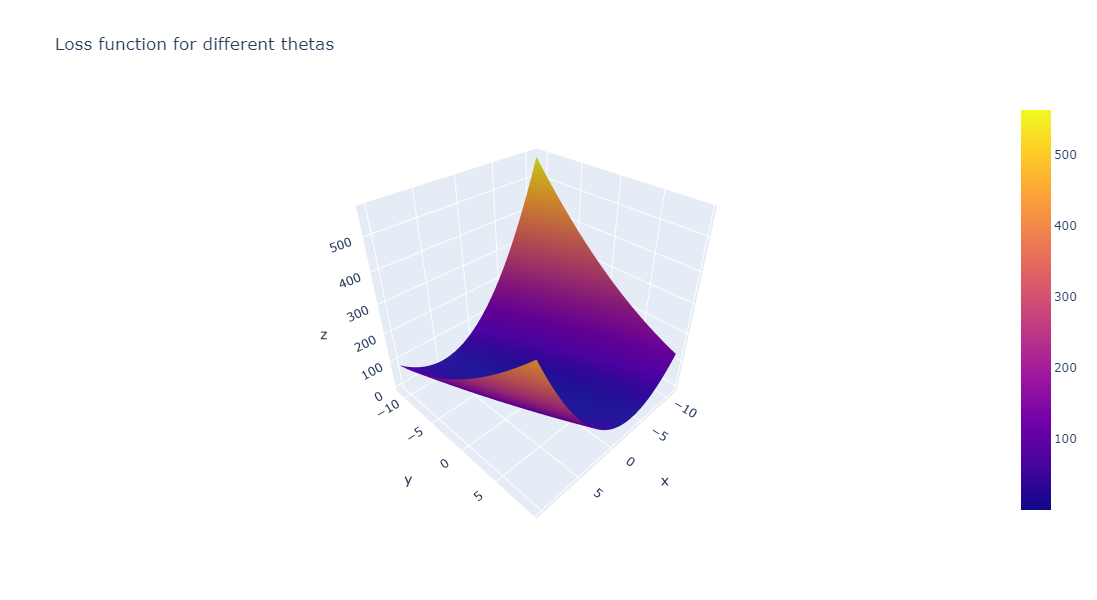

In [25]:
# This figure shows the loss function.

#X = Theta0
#Y = Theta1
#Z = Loss
# Find where it is closest to 0 in X and Y!

# you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

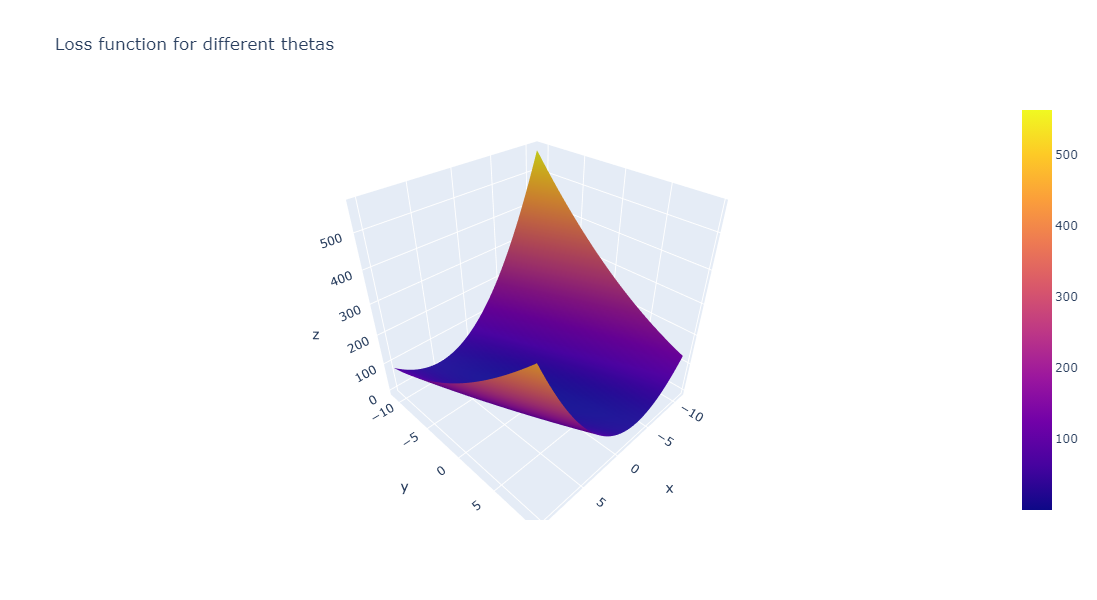

In [26]:
# Here is the same figure as above, with the line the loss function takes toward the minimum.

# X = Theta0
# Y - Theta1
# Z = Loss
# black line = path of loss function over the iterations.
# Find where it is closest to 0 in X and Y!

# You can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [27]:
# Rerun the optimization above, but this time start closer to the objective!
# Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=200 #<---start with the same iterations as above
theta_init=np.array([[0.3],[-0.3]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.006 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

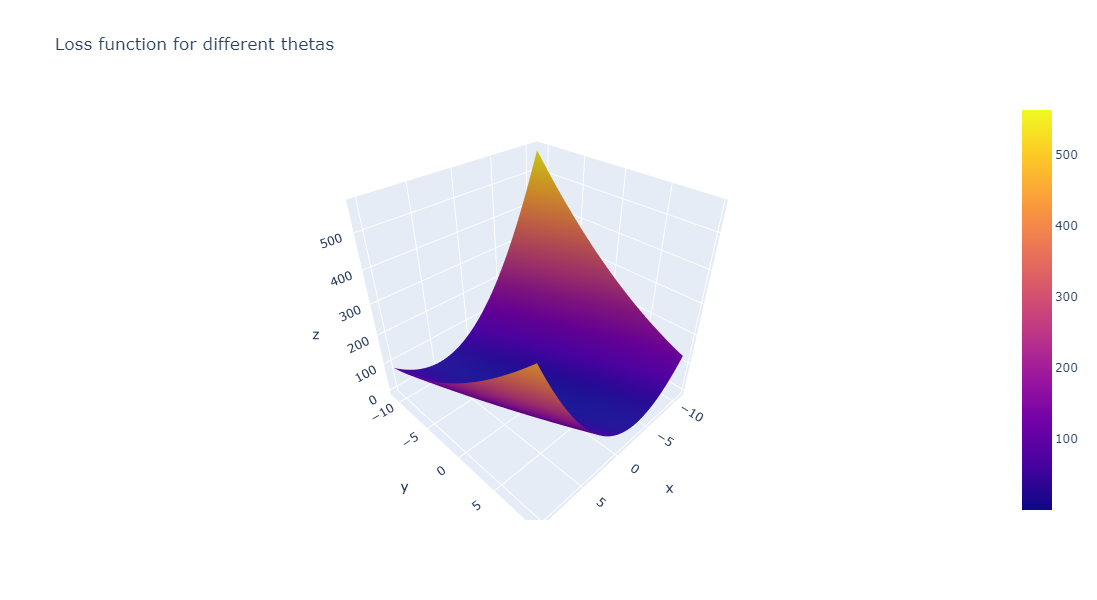

In [28]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

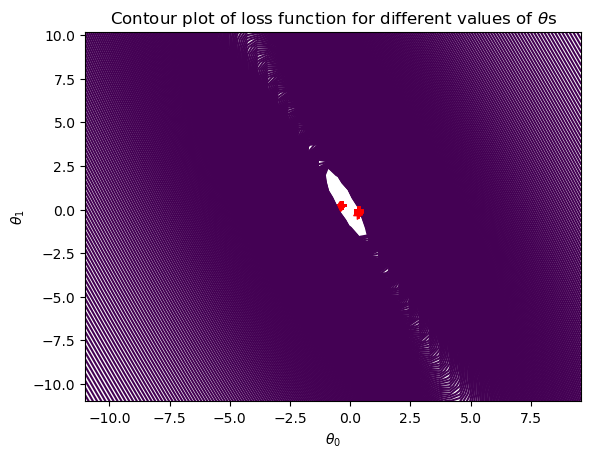

In [29]:
# This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

In [ ]:
#How well does gradient descent converge? How much do you need to adjust between different weather stations and years?